<a href="https://colab.research.google.com/github/paraxioms/Notebook_Store/blob/main/freshwaterPollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [ ]:
cruden = 'cruden.csv'
deveron = 'deveron.csv'
dyce = 'dyce.csv'
noss = 'noss.csv'
df_de = pd.read_csv(deveron, parse_dates=['SAMPLED_DATE'], dayfirst= True)
df_de.fillna(0, inplace=True)
df_c = pd.read_csv(cruden,parse_dates=['SAMPLED_DATE'], dayfirst= True)
df_c.fillna(0, inplace=True)
df_dy = pd.read_csv(dyce, parse_dates=['SAMPLED_DATE'], dayfirst= True)
df_dy.fillna(0, inplace=True)
df_n = pd.read_csv(noss, parse_dates=['SAMPLED_DATE'], dayfirst= True)
df_n.fillna(0, inplace=True)
df_c.head(5)

,Location,SAMPLED_DATE,Ancylidae,Ancylidae #,Asellidae,Athericidae,Baetidae,Caenidae,Ceratopogonidae,Chironomidae,Chloroperlidae,Crangonyctidae,Dendrocoelidae,Diptera,Dugesiidae,Dytiscidae,Dytiscidae #,Elmidae,Empididae,Ephemerellidae,Erpobdellidae,Gammaridae,Gammaridae #,Gerridae,Glossiphoniidae,Glossosomatidae,Goeridae,Heptageniidae,Hydracarina,Hydrobiidae,Hydrobiidae #,Hydropsychidae,Hydroptilidae,Lepidostomatidae,Leptoceridae,Leuctridae,Limnephilidae,Limoniidae,Lymnaeidae,Mites,Muscidae,Nematoda,Nematodes,Nemouridae,Unnamed: 44,Oligochaeta,Ostracoda,Pedicidae,Pediciidae,Perlidae,Perlodidae,Physidae,Planariidae,Planariidae #,Planorbidae,Polycentropodidae,Psychodidae,Psychomyiidae,Rhagionidae,Rhyacophilidae,Rhyacophilidae #,Sericostomatidae,Simuliidae,Sphaeriidae,Taeniopterygidae,Tipulidae
0,Water of Cruden u/s Morrisons,2005-04-26,0.0,2.0,3.0,0.0,12,0.0,3.0,9,5.0,0.0,0.0,0.0,0.0,0.0,20.0,32,0.0,0.0,0.0,0.0,80.0,0.0,2.0,0.0,0.0,15,0.0,0.0,85.0,3.0,0.0,5.0,20.0,5.0,5.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,20.0,0.0,2.0
1,Water of Cruden u/s Morrisons,2005-09-29,0.0,3.0,0.0,0.0,108,0.0,0.0,100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,1.0,2.0,0.0,0.0,228.0,0.0,0.0,0.0,0.0,43,0.0,0.0,23.0,25.0,0.0,45.0,4.0,0.0,0.0,0.0,30.0,2.0,0.0,0.0,0.0,0.0,0.0,30,0.0,0.0,0.0,0.0,7.0,0.0,0.0,5.0,7.0,6.0,0.0,0.0,6.0,0.0,97.0,3.0,6.0,2.0,0.0,7.0
2,Water of Cruden u/s Morrisons,2006-03-10,0.0,8.0,1.0,0.0,40,0.0,0.0,50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.0,0.0,0.0,0.0,560.0,0.0,0.0,0.0,0.0,80,0.0,0.0,20.0,80.0,0.0,30.0,5.0,24.0,0.0,0.0,20.0,4.0,0.0,0.0,1.0,0.0,0.0,80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,64.0,5.0,0.0,10.0,0.0,3.0
3,Water of Cruden u/s Morrisons,2006-04-25,0.0,16.0,0.0,0.0,160,3.0,3.0,160,0.0,0.0,0.0,0.0,0.0,0.0,1.0,128,4.0,0.0,0.0,0.0,112.0,0.0,0.0,0.0,0.0,52,0.0,0.0,20.0,96.0,0.0,20.0,0.0,2.0,0.0,0.0,6.0,2.0,0.0,0.0,2.0,0.0,0.0,64,0.0,0.0,0.0,0.0,2.0,0.0,0.0,12.0,1.0,0.0,0.0,0.0,24.0,0.0,240.0,12.0,112.0,4.0,0.0,2.0
4,Water of Cruden u/s Morrisons,2007-04-02,32.0,0.0,10.0,1.0,656,0.0,1.0,45,0.0,0.0,2.0,0.0,0.0,1.0,0.0,180,1.0,0.0,0.0,256.0,0.0,0.0,6.0,240.0,1.0,169,0.0,40.0,0.0,112.0,0.0,18.0,10.0,1.0,2.0,0.0,24.0,1.0,0.0,0.0,3.0,0.0,0.0,246,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,6.0,0.0,1.0,0.0,0.0,24.0,0.0,12.0,192.0,16.0,0.0,1.0


In [ ]:
df = pd.concat([df_de, df_c, df_dy, df_n], sort=False)
df.columns

Index(['Location', 'SAMPLED_DATE', 'Ameletidae', 'Ancylidae', 'Ancylidae #',
       'Baetidae', 'Brachycentridae', 'Caenidae', 'Ceratopogonidae',
       'Chironomidae', 'Chloroperlidae', 'Curculionidae', 'Dendrocoelidae',
       'Dytiscidae', 'Dytiscidae #', 'Elmidae', 'Empididae', 'Ephemerellidae',
       'Erpobdellidae', 'Gammaridae', 'Glossiphoniidae', 'Glossosomatidae',
       'Goeridae', 'Heptageniidae', 'Hydracarina', 'Hydraenidae',
       'Hydrophilidae #', 'Hydropsychidae', 'Hydroptilidae',
       'Lepidostomatidae', 'Leptoceridae', 'Leptophlebiidae', 'Leuctridae',
       'Limnephilidae', 'Limoniidae', 'Lymnaeidae', 'Mites', 'Muscidae',
       'Nematoda', 'Nematodes', 'Nematomorpha', 'Nemouridae', 'Oligochaeta',
       'Pedicidae', 'Pediciidae', 'Perlidae', 'Perlodidae', 'Planariidae',
       'Polycentropodidae', 'Psychodidae', 'Psychomyiidae', 'Ptychopteridae',
       'Rhyacophilidae', 'Rhyacophilidae #', 'Scirtidae', 'Sericostomatidae',
       'Simuliidae', 'Siphlonuridae', '

In [ ]:
family_dict = {"Planariidae":[5, 4.2],
"Dendrocoelidae": [5, 3.1],
"Neritidae": [6, 7.5 ],
"Viviparidae": [6, 6.3],
"Valvatidae": [3, 2.8],
"Hydrobiidae": [3, 3.9],
"Lymnaeidae": [3, 3.0],
"Physidae": [3, 1.8],
"Planorbidae":[3, 2.9],
"Ancylidae": [6, 5.6],
"Unionidae": [6, 5.2],
"Sphaeriidae": [3, 3.6],
"Oligochaeta": [1, 3.5],
"Piscicolidae": [4, 5.0],
"Glossiphoniidae": [3, 3.1],
"Hirudididae": [3, 0.0],
"Erpobdellidae": [3, 2.8],
"Asellidae": [3, 2.1],
"Corophiidae": [6, 6.1],
"Gammaridae": [6, 4.5],
"Astacidae": [8, 9.0],
"Siphlonuridae": [10, 11.0], 
"Baetidae": [4, 5.3],
"Heptageniidae": [10, 9.8],
"Leptophlebiidae": [10, 8.9],
"Ephemerellidae": [10, 7.7],
"Potamanthidae": [10, 7.6],
"Ephemeridae": [10, 9.3],
"Caenidae": [7, 7.1],
"Taeniopterygidae": [10, 10.8],
"Nemouridae": [7, 9.1],
"Leuctridae": [10, 9.9],
"Capniidae": [10, 10.0],
"Perlodidae": [10, 10.7],
"Perlidae": [10, 12.5],
"Chloroperlidae": [10, 12.4],
"Platycnemidae": [6, 5.1],
"Coenagriidae": [6, 3.5],
"Lestidae": [8, 5.4],
"Calopterygidae": [8, 6.4],
"Gomphidae": [8],
"Cordulegasteridae": [8, 8.6],
"Aeshnidae": [8, 6.1],
"Corduliidae": [8],
"Libellulidae": [8, 5.0],
"Mesoveliidae": [5, 4.7],
"Hydrometridae": [5, 5.3],
"Gerridae": [5, 4.7],
"Nepidae": [5, 4.3],
"Naucoridae": [5, 4.3],
"Aphelocheiridae": [10, 8.9],
"Notonectidae": [5, 3.8],
"Pleidae": [5, 3.9],
"Corixidae": [5, 3.7],
"Haliplidae": [5, 4.0],
"Hygrobiidae": [5, 2.6],
"Dytiscidae": [5, 4.8],
"Gyrinidae": [5, 7.8],
"Hydrophilidae": [5, 5.1],
"Clambidae": [5],
"Scirtidae": [5, 6.5],
"Dryopidae": [5, 6.5],
"Elmidae": [5, 6.4],
"Chrysomelidae": [5, 4.2],
"Curculionidae": [5, 4.0],
"Sialidae": [4, 4.5],
"Rhyacophilidae": [7, 8.3],
"Philopotamidae": [8, 10.6],
"Polycentropidae": [7, 8.6],
"Psychomyiidae": [8, 6.9],
"Hydropsychidae": [5, 6.6],
"Hydroptilidae": [6, 6.7],
"Phryganeidae": [10, 7.0],
"Limnephilidae": [7, 6.9],
"Molannidae": [10, 8.9],
"Beraeidae": [10, 9.0],
"Odontoceridae": [10, 10.9],
"Leptoceridae": [10, 7.8],
"Goeridae": [10, 9.9],
"Lepidostomatidae": [10, 10.4], 
"Brachycentridae": [10, 9.4],
"Sericostomatidae":[10, 9.2],
"Tipulidae": [5, 5.5],
"Chironomidae": [2, 3.7],
"Simuliidae": [5, 5.8]}

In [ ]:
allcolumns = list(df.columns)
sorted(allcolumns)

['Ameletidae',
 'Ancylidae',
 'Ancylidae #',
 'Asellidae',
 'Athericidae',
 'Baetidae',
 'Brachycentridae',
 'Caenidae',
 'Ceratopogonidae',
 'Chironomidae',
 'Chloroperlidae',
 'Corixidae',
 'Crangonyctidae',
 'Curculionidae',
 'Dendrocoelidae',
 'Diptera',
 'Dolichopodidae',
 'Dugesiidae',
 'Dytiscidae',
 'Dytiscidae #',
 'Elmidae',
 'Empididae',
 'Ephemerellidae',
 'Ephydridae',
 'Erpobdellidae',
 'Gammaridae',
 'Gammaridae #',
 'Gerridae',
 'Glossiphoniidae',
 'Glossosomatidae',
 'Goeridae',
 'Helophoridae',
 'Hemiptera',
 'Heptageniidae',
 'Hirudinidae',
 'Hydracarina',
 'Hydraenidae',
 'Hydrobiidae',
 'Hydrobiidae #',
 'Hydrophilidae',
 'Hydrophilidae #',
 'Hydropsychidae',
 'Hydroptilidae',
 'Isotomidae',
 'Lepidostomatidae',
 'Leptoceridae',
 'Leptophlebiidae',
 'Leuctridae',
 'Limnephilidae',
 'Limoniidae',
 'Location',
 'Lymnaeidae',
 'Mites',
 'Muscidae',
 'Nematoda',
 'Nematodes',
 'Nematomorpha',
 'Nemouridae',
 'Oligochaeta',
 'Ostracoda',
 'Pedicidae',
 'Pediciidae',
 'P

In [ ]:
for i in df.columns:
  e = 0
  if i[-1] == '#':
    e = i[0:-2]
  if (i not in family_dict) and (e not in family_dict) and (i not in ['SAMPLED_DATE','Location']) :
    print("No BMWP score: ", i)
  #else:
  #  print("YES", i)

No BMWP score:  Ameletidae
No BMWP score:  Ceratopogonidae
No BMWP score:  Empididae
No BMWP score:  Glossosomatidae
No BMWP score:  Hydracarina
No BMWP score:  Hydraenidae
No BMWP score:  Limoniidae
No BMWP score:  Mites
No BMWP score:  Muscidae
No BMWP score:  Nematoda
No BMWP score:  Nematodes
No BMWP score:  Nematomorpha
No BMWP score:  Pedicidae
No BMWP score:  Pediciidae
No BMWP score:  Polycentropodidae
No BMWP score:  Psychodidae
No BMWP score:  Ptychopteridae
No BMWP score:  Athericidae
No BMWP score:  Crangonyctidae
No BMWP score:  Diptera
No BMWP score:  Dugesiidae
No BMWP score:  Unnamed: 44
No BMWP score:  Ostracoda
No BMWP score:  Rhagionidae
No BMWP score:  Helophoridae
No BMWP score:  Dolichopodidae
No BMWP score:  Ephydridae
No BMWP score:  Hemiptera
No BMWP score:  Hirudinidae
No BMWP score:  Isotomidae
No BMWP score:  Veliidae


In [ ]:
def bmwp_families(family_names):
  present_family_names = []
  for i in family_names:
    e = 0
    if i[-1] == '#':
      e = i[0:-2]
    if (i in family_dict) or (e in family_dict) :
      present_family_names.append(i)
  return present_family_names
bmwp_families(df_de.columns)
 

['Ancylidae',
 'Ancylidae #',
 'Baetidae',
 'Brachycentridae',
 'Caenidae',
 'Chironomidae',
 'Chloroperlidae',
 'Curculionidae',
 'Dendrocoelidae',
 'Dytiscidae',
 'Dytiscidae #',
 'Elmidae',
 'Ephemerellidae',
 'Erpobdellidae',
 'Gammaridae',
 'Glossiphoniidae',
 'Goeridae',
 'Heptageniidae',
 'Hydrophilidae #',
 'Hydropsychidae',
 'Hydroptilidae',
 'Lepidostomatidae',
 'Leptoceridae',
 'Leptophlebiidae',
 'Leuctridae',
 'Limnephilidae',
 'Lymnaeidae',
 'Nemouridae',
 'Oligochaeta',
 'Perlidae',
 'Perlodidae',
 'Planariidae',
 'Psychomyiidae',
 'Rhyacophilidae',
 'Rhyacophilidae #',
 'Scirtidae',
 'Sericostomatidae',
 'Simuliidae',
 'Siphlonuridae',
 'Sphaeriidae',
 'Taeniopterygidae',
 'Tipulidae']

In [ ]:
df_de.iloc[2].index[2]

Location            207015 : R. Deveron Cabrach
SAMPLED_DATE                2007-05-28 00:00:00
Ameletidae                                    0
Ancylidae                                     3
Ancylidae #                                   0
                               ...             
Simuliidae                                    2
Siphlonuridae                                 0
Sphaeriidae                                   0
Taeniopterygidae                              0
Tipulidae                                     3
Name: 2, Length: 61, dtype: object

In [ ]:
def calculate_BMWP(bmwp_family_list, revised=False):
  bmwp_score = 0
  for family in bmwp_family_list:
    score = bmwp_lookup(family, revised)
    bmwp_score = bmwp_score + score
  return bmwp_score


In [ ]:
def bmwp_lookup(family, revised=False):
  family_hashtag = family[0:-2]
  try:
    vals = family_dict[family]
    if revised == True:
      bmwp_val = vals[1]
    elif revised == False:
      bmwp_val = vals[0]
    return bmwp_val
  except KeyError:
    vals = family_dict[family_hashtag]
    if revised == True:
      bmwp_val = vals[1]
    elif revised == False:
      bmwp_val = vals[0]
    return bmwp_val

bmwp_lookup('Ancylidae #', False)

6

In [ ]:
def calculate_Index(dataframe):
  BMWP_NUMBER_LIST = []
  BMWP_SCORES = []
  BMWP_SCORES_REVISED = []
  SPECIES_RICHNESS_LIST = []
  ASPT_SCORES = []
  ASPT_SCORES_REVISED = []
  SHANNON_SCORES = shannons_diversity_index(dataframe)
  SIMPSONS_SCORES = simpsons_diversity_index(dataframe)

  for i in range(0,len(dataframe)):
    SPECIES_PRESENT = [dataframe.iloc[i].index[a] for a,b in enumerate(dataframe.iloc[i]) if type(b) != str and type(b) != pd.Timestamp and b > 0 ]
    BMWP_SPECIES =  bmwp_families(SPECIES_PRESENT)
    SPECIES_RICHNESS_LIST.append(len(SPECIES_PRESENT))
    BMWP_NUMBER_LIST.append(len(BMWP_SPECIES))
    bmwp_score = calculate_BMWP(BMWP_SPECIES)
    bmwp_score_revised = calculate_BMWP(BMWP_SPECIES, revised=True)
    BMWP_SCORES.append(bmwp_score)
    BMWP_SCORES_REVISED.append(bmwp_score_revised)
    aspt_score = bmwp_score/len(BMWP_SPECIES)
    aspt_score_revised = bmwp_score_revised/len(BMWP_SPECIES)
    ASPT_SCORES.append(aspt_score)
    ASPT_SCORES_REVISED.append(aspt_score_revised)

  dataframe['BMWP'] = BMWP_SCORES
  dataframe['ASPT'] = ASPT_SCORES
  dataframe['Shannons Diversity Index'] = SHANNON_SCORES
  dataframe['Simpsons Diversity Index'] = SIMPSONS_SCORES
  dataframe['Species Richness'] = SPECIES_RICHNESS_LIST
  dataframe['Revised BMWP'] = BMWP_SCORES_REVISED
  dataframe['Revised ASPT'] = ASPT_SCORES_REVISED

  #BMWP_NUMBER_LIST.append(BMWP_NUMBER)
  #print(len(BMWP_NUMBER))


#print(SPECIES_RICHNESS_LIST)
#print(BMWP_NUMBER_LIST)
#print(BMWP_SCORES)
#print(ASPT_SCORES)


In [ ]:
calculate_Index(df_de)
calculate_Index(df_c)
calculate_Index(df_dy)
calculate_Index(df_n)


In [ ]:
def simpsons_diversity_index(dataframe):
  simps_list = []
  for i in range(0,len(dataframe)):
    species_numbers = [a for a in dataframe.iloc[i] if type(a) != str and type(a) != pd.Timestamp and a > 0 ]
    total_individuals = sum(species_numbers)
    numerator = 0
    for j in species_numbers:
      numerator = numerator + j*(j-1)
    denominator = total_individuals*(total_individuals-1)
    simps_score = 1-numerator/denominator
    simps_list.append(simps_score)
  return simps_list

simpsons_diversity_index(pd.DataFrame([[81,2,2,2,2],[81,2,2,2,2]]))

[0.1716036772216547, 0.1716036772216547]

In [ ]:
def shannons_diversity_index(dataframe):
  shann_list = []
  for i in range(0,len(dataframe)):
    species_numbers = [a for a in dataframe.iloc[i] if type(a) != str and type(a) != pd.Timestamp and a > 0 ]
    species_richness = len(species_numbers)
    total_individuals = sum(species_numbers)
    proportions = [b/total_individuals for b in species_numbers]
    shannon_part1 = 0
    for j in proportions:
      shannon_part1 = shannon_part1 + j*np.log(j)
    shannon_score = -1* shannon_part1
    shann_list.append(shannon_score)
  return shann_list

shannons_diversity_index(pd.DataFrame([[81,2,2,2,2],[81,2,2,2,2]]))



[0.4268885161035207, 0.4268885161035207]

In [ ]:
def plotTime(ylabel):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=df_de['SAMPLED_DATE'], y=df_de[ylabel], mode='lines+markers', name="Deveron Cabrach"))
  fig.add_trace(go.Scatter(x=df_c['SAMPLED_DATE'], y=df_c[ylabel], mode='lines+markers', name="Water of Cruden"))
  fig.add_trace(go.Scatter(x=df_dy['SAMPLED_DATE'], y=df_dy[ylabel], mode='lines+markers', name="Mains of Dyce"))
  fig.add_trace(go.Scatter(x=df_n['SAMPLED_DATE'], y=df_n[ylabel], mode='lines+markers', name="Burn Of Noss"))
  fig.update_yaxes(title_text = ylabel)
  fig.update_xaxes(title_text = "Date")
  fig.show()

### TimePlots

In [ ]:
df_c.columns

Index(['Location', 'SAMPLED_DATE', 'Ancylidae', 'Ancylidae #', 'Asellidae',
       'Athericidae', 'Baetidae', 'Caenidae', 'Ceratopogonidae',
       'Chironomidae', 'Chloroperlidae', 'Crangonyctidae', 'Dendrocoelidae',
       'Diptera', 'Dugesiidae', 'Dytiscidae', 'Dytiscidae #', 'Elmidae',
       'Empididae', 'Ephemerellidae', 'Erpobdellidae', 'Gammaridae',
       'Gammaridae #', 'Gerridae', 'Glossiphoniidae', 'Glossosomatidae',
       'Goeridae', 'Heptageniidae', 'Hydracarina', 'Hydrobiidae',
       'Hydrobiidae #', 'Hydropsychidae', 'Hydroptilidae', 'Lepidostomatidae',
       'Leptoceridae', 'Leuctridae', 'Limnephilidae', 'Limoniidae',
       'Lymnaeidae', 'Mites', 'Muscidae', 'Nematoda', 'Nematodes',
       'Nemouridae', 'Unnamed: 44', 'Oligochaeta', 'Ostracoda', 'Pedicidae',
       'Pediciidae', 'Perlidae', 'Perlodidae', 'Physidae', 'Planariidae',
       'Planariidae #', 'Planorbidae', 'Polycentropodidae', 'Psychodidae',
       'Psychomyiidae', 'Rhagionidae', 'Rhyacophilidae', 'Rhy

In [ ]:
plotTime('BMWP')

In [ ]:
plotTime('Revised BMWP')

In [ ]:
plotTime('ASPT')

In [ ]:
plotTime('Revised ASPT')

In [ ]:
plotTime('Shannons Diversity Index')

In [ ]:
plotTime('Simpsons Diversity Index')

In [ ]:
plotTime('Species Richness')

### Correlations Plots

In [ ]:
df_c.columns

Index(['Location', 'SAMPLED_DATE', 'Ancylidae', 'Ancylidae #', 'Asellidae',
       'Athericidae', 'Baetidae', 'Caenidae', 'Ceratopogonidae',
       'Chironomidae', 'Chloroperlidae', 'Crangonyctidae', 'Dendrocoelidae',
       'Diptera', 'Dugesiidae', 'Dytiscidae', 'Dytiscidae #', 'Elmidae',
       'Empididae', 'Ephemerellidae', 'Erpobdellidae', 'Gammaridae',
       'Gammaridae #', 'Gerridae', 'Glossiphoniidae', 'Glossosomatidae',
       'Goeridae', 'Heptageniidae', 'Hydracarina', 'Hydrobiidae',
       'Hydrobiidae #', 'Hydropsychidae', 'Hydroptilidae', 'Lepidostomatidae',
       'Leptoceridae', 'Leuctridae', 'Limnephilidae', 'Limoniidae',
       'Lymnaeidae', 'Mites', 'Muscidae', 'Nematoda', 'Nematodes',
       'Nemouridae', 'Unnamed: 44', 'Oligochaeta', 'Ostracoda', 'Pedicidae',
       'Pediciidae', 'Perlidae', 'Perlodidae', 'Physidae', 'Planariidae',
       'Planariidae #', 'Planorbidae', 'Polycentropodidae', 'Psychodidae',
       'Psychomyiidae', 'Rhagionidae', 'Rhyacophilidae', 'Rhy

In [ ]:
comparison_list = ['BMWP', 'Revised BMWP', 'ASPT', 'Revised ASPT', 'Species Richness', 'Shannons Diversity Index', 'Simpsons Diversity Index']

In [ ]:
combined_df = df_de.append([df_c, df_dy, df_n],ignore_index=True)
combined_df

,Location,SAMPLED_DATE,Ameletidae,Ancylidae,Ancylidae #,Baetidae,Brachycentridae,Caenidae,Ceratopogonidae,Chironomidae,Chloroperlidae,Curculionidae,Dendrocoelidae,Dytiscidae,Dytiscidae #,Elmidae,Empididae,Ephemerellidae,Erpobdellidae,Gammaridae,Glossiphoniidae,Glossosomatidae,Goeridae,Heptageniidae,Hydracarina,Hydraenidae,Hydrophilidae #,Hydropsychidae,Hydroptilidae,Lepidostomatidae,Leptoceridae,Leptophlebiidae,Leuctridae,Limnephilidae,Limoniidae,Lymnaeidae,Mites,Muscidae,Nematoda,Nematodes,...,Rhyacophilidae,Rhyacophilidae #,Scirtidae,Sericostomatidae,Simuliidae,Siphlonuridae,Sphaeriidae,Taeniopterygidae,Tipulidae,BMWP,ASPT,Shannons Diversity Index,Simpsons Diversity Index,Species Richness,Revised BMWP,Revised ASPT,Asellidae,Athericidae,Crangonyctidae,Diptera,Dugesiidae,Gammaridae #,Gerridae,Hydrobiidae,Hydrobiidae #,Unnamed: 44,Ostracoda,Physidae,Planariidae #,Planorbidae,Rhagionidae,Helophoridae,Hydrophilidae,Corixidae,Dolichopodidae,Ephydridae,Hemiptera,Hirudinidae,Isotomidae,Veliidae
0,207015 : R. Deveron Cabrach,2005-05-04,0.0,0.0,2.0,105.0,0.0,13.0,0.0,8,17.0,0.0,0.0,0.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,114,6.705882,2.121710,0.829920,20,130.7,7.688235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,207015 : R. Deveron Cabrach,2005-10-04,0.0,0.0,10.0,10.0,1.0,10.0,0.0,150,2.0,0.0,0.0,0.0,0.0,50.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,85.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,15.0,8.0,0.0,13.0,1.0,0.0,0.0,2.0,...,0.0,90.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,132,6.285714,2.167964,0.837416,25,144.9,6.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,207015 : R. Deveron Cabrach,2007-05-28,0.0,3.0,0.0,12.0,0.0,15.0,0.0,45,3.0,0.0,0.0,1.0,0.0,14.0,8.0,7.0,0.0,0.0,0.0,12.0,3.0,18.0,0.0,8.0,0.0,15.0,12.0,0.0,0.0,0.0,22.0,0.0,0.0,1.0,24.0,0.0,0.0,2.0,...,8.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,161,6.708333,2.988528,0.938013,30,174.6,7.275000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,207015 : R. Deveron Cabrach,2007-11-05,0.0,2.0,0.0,6.0,0.0,2.0,0.0,60,1.0,0.0,0.0,3.0,0.0,11.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,17.0,13.0,0.0,1.0,1.0,0.0,0.0,2.0,...,6.0,0.0,2.0,3.0,5.0,0.0,0.0,0.0,4.0,149,6.478261,2.670548,0.879198,29,164.5,7.152174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,207015 : R. Deveron Cabrach,2008-05-13,0.0,7.0,0.0,55.0,0.0,25.0,0.0,85,10.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,0.0,1.0,8.0,38.0,0.0,10.0,0.0,55.0,6.0,3.0,0.0,0.0,90.0,3.0,0.0,3.0,8.0,0.0,0.0,0.0,...,15.0,0.0,0.0,5.0,25.0,0.0,0.0,2.0,2.0,173,6.920000,2.683882,0.905145,30,190.2,7.608000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,330206 : Burn of Noss,2014-09-17,NaN,0.0,NaN,42.0,NaN,NaN,0.0,864,NaN,NaN,NaN,39.0,NaN,NaN,20.0,NaN,0.0,19.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,17.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,28,4.000000,0.978421,0.459784,8,31.7,4.528571,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,330206 : Burn of Noss,2015-04-16,NaN,0.0,NaN,276.0,NaN,NaN,1.0,164,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0,21.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,0.0,3.0,...,NaN,NaN,NaN,NaN,19.0,NaN,0.0,NaN,0.0,23,3.833333,0.368878,0.154650,10,27.6,4.600000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
def correlations(dataframe):
  corr = dataframe[comparison_list].corr()
  plt.subplots(figsize=(9,7))
  ax = sns.heatmap(corr, vmax=1, cmap="Reds", square=True, annot=True);

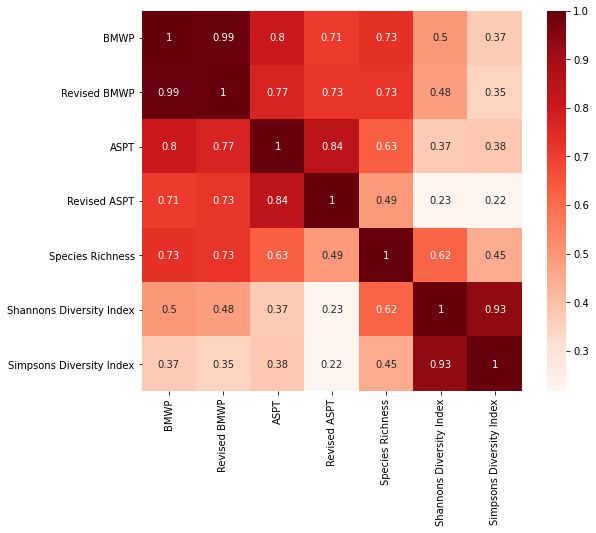

In [ ]:
correlations(df_n)

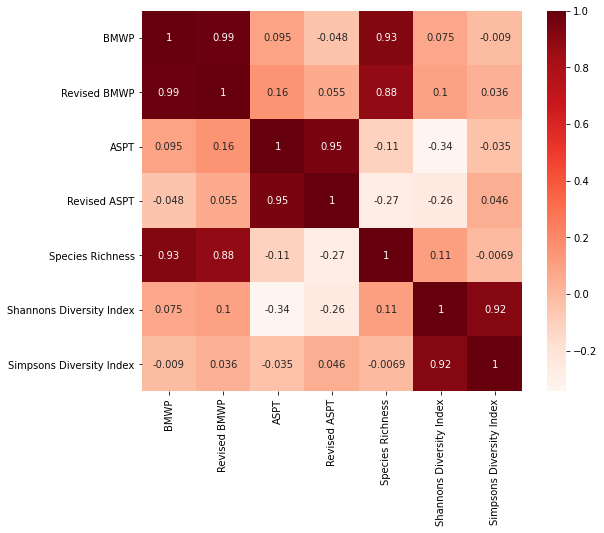

In [ ]:
correlations(df_c)

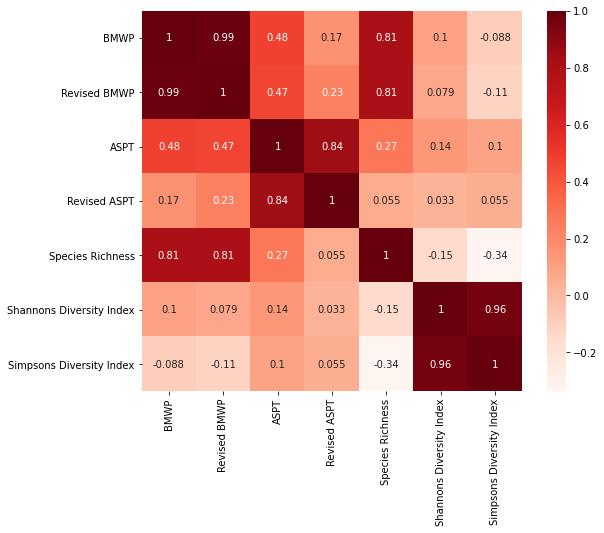

In [ ]:
correlations(df_de)

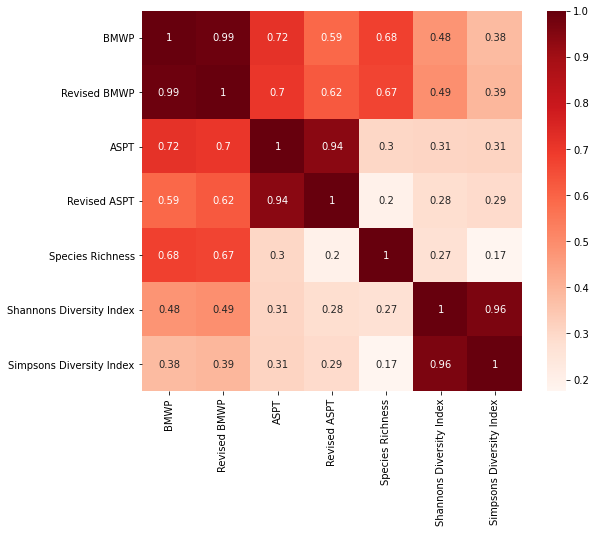

In [ ]:
correlations(df_dy)

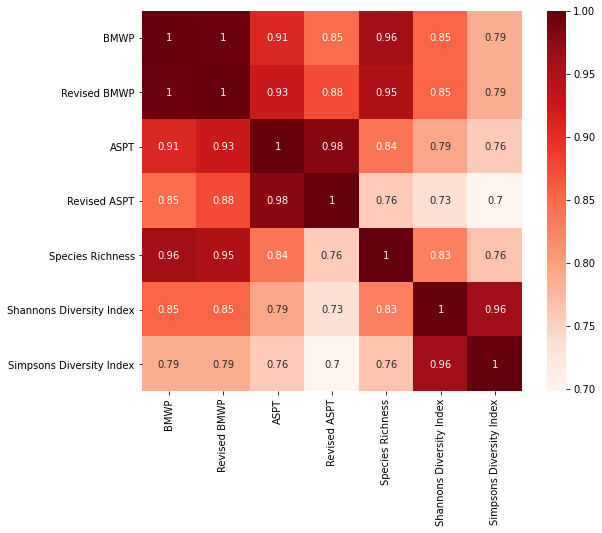

In [ ]:
correlations(combined_df)

### Average Plots

In [ ]:
df_c.head()

,Location,SAMPLED_DATE,Ancylidae,Ancylidae #,Asellidae,Athericidae,Baetidae,Caenidae,Ceratopogonidae,Chironomidae,Chloroperlidae,Crangonyctidae,Dendrocoelidae,Diptera,Dugesiidae,Dytiscidae,Dytiscidae #,Elmidae,Empididae,Ephemerellidae,Erpobdellidae,Gammaridae,Gammaridae #,Gerridae,Glossiphoniidae,Glossosomatidae,Goeridae,Heptageniidae,Hydracarina,Hydrobiidae,Hydrobiidae #,Hydropsychidae,Hydroptilidae,Lepidostomatidae,Leptoceridae,Leuctridae,Limnephilidae,Limoniidae,Lymnaeidae,Mites,Muscidae,Nematoda,Nematodes,Nemouridae,Unnamed: 44,Oligochaeta,Ostracoda,Pedicidae,Pediciidae,Perlidae,Perlodidae,Physidae,Planariidae,Planariidae #,Planorbidae,Polycentropodidae,Psychodidae,Psychomyiidae,Rhagionidae,Rhyacophilidae,Rhyacophilidae #,Sericostomatidae,Simuliidae,Sphaeriidae,Taeniopterygidae,Tipulidae,BMWP,ASPT,Shannons Diversity Index,Simpsons Diversity Index,Species Richness,Revised BMWP,Revised ASPT
0,Water of Cruden u/s Morrisons,2005-04-26,0.0,2.0,3.0,0.0,12,0.0,3.0,9,5.0,0.0,0.0,0.0,0.0,0.0,20.0,32,0.0,0.0,0.0,0.0,80.0,0.0,2.0,0.0,0.0,15,0.0,0.0,85.0,3.0,0.0,5.0,20.0,5.0,5.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,20.0,0.0,2.0,126,5.478261,2.543468,0.891073,26,134.2,5.834783
1,Water of Cruden u/s Morrisons,2005-09-29,0.0,3.0,0.0,0.0,108,0.0,0.0,100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,1.0,2.0,0.0,0.0,228.0,0.0,0.0,0.0,0.0,43,0.0,0.0,23.0,25.0,0.0,45.0,4.0,0.0,0.0,0.0,30.0,2.0,0.0,0.0,0.0,0.0,0.0,30,0.0,0.0,0.0,0.0,7.0,0.0,0.0,5.0,7.0,6.0,0.0,0.0,6.0,0.0,97.0,3.0,6.0,2.0,0.0,7.0,128,5.818182,2.368756,0.860312,26,131.5,5.977273
2,Water of Cruden u/s Morrisons,2006-03-10,0.0,8.0,1.0,0.0,40,0.0,0.0,50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.0,0.0,0.0,0.0,560.0,0.0,0.0,0.0,0.0,80,0.0,0.0,20.0,80.0,0.0,30.0,5.0,24.0,0.0,0.0,20.0,4.0,0.0,0.0,1.0,0.0,0.0,80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,64.0,5.0,0.0,10.0,0.0,3.0,121,5.761905,1.983647,0.731786,25,127.5,6.071429
3,Water of Cruden u/s Morrisons,2006-04-25,0.0,16.0,0.0,0.0,160,3.0,3.0,160,0.0,0.0,0.0,0.0,0.0,0.0,1.0,128,4.0,0.0,0.0,0.0,112.0,0.0,0.0,0.0,0.0,52,0.0,0.0,20.0,96.0,0.0,20.0,0.0,2.0,0.0,0.0,6.0,2.0,0.0,0.0,2.0,0.0,0.0,64,0.0,0.0,0.0,0.0,2.0,0.0,0.0,12.0,1.0,0.0,0.0,0.0,24.0,0.0,240.0,12.0,112.0,4.0,0.0,2.0,125,5.681818,2.485939,0.894691,27,134.7,6.122727
4,Water of Cruden u/s Morrisons,2007-04-02,32.0,0.0,10.0,1.0,656,0.0,1.0,45,0.0,0.0,2.0,0.0,0.0,1.0,0.0,180,1.0,0.0,0.0,256.0,0.0,0.0,6.0,240.0,1.0,169,0.0,40.0,0.0,112.0,0.0,18.0,10.0,1.0,2.0,0.0,24.0,1.0,0.0,0.0,3.0,0.0,0.0,246,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,6.0,0.0,1.0,0.0,0.0,24.0,0.0,12.0,192.0,16.0,0.0,1.0,156,5.777778,2.367574,0.864511,34,160.5,5.944444


In [ ]:
df_c.columns

Index(['Location', 'SAMPLED_DATE', 'Ancylidae', 'Ancylidae #', 'Asellidae',
       'Athericidae', 'Baetidae', 'Caenidae', 'Ceratopogonidae',
       'Chironomidae', 'Chloroperlidae', 'Crangonyctidae', 'Dendrocoelidae',
       'Diptera', 'Dugesiidae', 'Dytiscidae', 'Dytiscidae #', 'Elmidae',
       'Empididae', 'Ephemerellidae', 'Erpobdellidae', 'Gammaridae',
       'Gammaridae #', 'Gerridae', 'Glossiphoniidae', 'Glossosomatidae',
       'Goeridae', 'Heptageniidae', 'Hydracarina', 'Hydrobiidae',
       'Hydrobiidae #', 'Hydropsychidae', 'Hydroptilidae', 'Lepidostomatidae',
       'Leptoceridae', 'Leuctridae', 'Limnephilidae', 'Limoniidae',
       'Lymnaeidae', 'Mites', 'Muscidae', 'Nematoda', 'Nematodes',
       'Nemouridae', 'Unnamed: 44', 'Oligochaeta', 'Ostracoda', 'Pedicidae',
       'Pediciidae', 'Perlidae', 'Perlodidae', 'Physidae', 'Planariidae',
       'Planariidae #', 'Planorbidae', 'Polycentropodidae', 'Psychodidae',
       'Psychomyiidae', 'Rhagionidae', 'Rhyacophilidae', 'Rhy

In [ ]:
df_c['BMWP'].iloc[-1]

144

In [ ]:
def printAverages(index):
  print("MEANS ACROSS ALL TIMESTEPS")
  print("DEVERON ", index, df_de[index].mean())
  print("CRUDEN ",index, df_c[index].mean())
  print("DYCE ", index, df_dy[index].mean())
  print("NOSS", index, df_n[index].mean())

In [ ]:
def printLast(index):
  print("Most Recent Observation")
  print("DEVERON ", index, df_de[index].iloc[-1])
  print("CRUDEN ",index, df_c[index].iloc[-1])
  print("DYCE ", index, df_dy[index].iloc[-1])
  print("NOSS", index, df_n[index].iloc[-1])

In [ ]:
printAverages("BMWP")

MEANS ACROSS ALL TIMESTEPS
DEVERON  BMWP 143.5
CRUDEN  BMWP 137.375
DYCE  BMWP 103.16666666666667
NOSS BMWP 23.526315789473685


In [ ]:
printAverages("Revised BMWP")

MEANS ACROSS ALL TIMESTEPS
DEVERON  Revised BMWP 157.85
CRUDEN  Revised BMWP 143.5291666666667
DYCE  Revised BMWP 112.18333333333332
NOSS Revised BMWP 26.68421052631579


In [ ]:
printAverages("ASPT")

MEANS ACROSS ALL TIMESTEPS
DEVERON  ASPT 6.732624897660332
CRUDEN  ASPT 5.834719067352061
DYCE  ASPT 5.774856411862992
NOSS ASPT 3.7900224044960886


In [ ]:
printAverages("Revised ASPT")

MEANS ACROSS ALL TIMESTEPS
DEVERON  Revised ASPT 7.415052920543434
CRUDEN  Revised ASPT 6.1033252164750955
DYCE  Revised ASPT 6.284513415380772
NOSS Revised ASPT 4.347808536492747


In [ ]:
printLast("BMWP")

Most Recent Observation
DEVERON  BMWP 121
CRUDEN  BMWP 144
DYCE  BMWP 116
NOSS BMWP 47


In [ ]:
printLast("Revised BMWP")

Most Recent Observation
DEVERON  Revised BMWP 133.0
CRUDEN  Revised BMWP 146.40000000000003
DYCE  Revised BMWP 124.4
NOSS Revised BMWP 52.49999999999999


In [ ]:
printLast("ASPT")

Most Recent Observation
DEVERON  ASPT 6.722222222222222
CRUDEN  ASPT 5.538461538461538
DYCE  ASPT 6.444444444444445
NOSS ASPT 4.2727272727272725


In [ ]:
printLast("Revised ASPT")

Most Recent Observation
DEVERON  Revised ASPT 7.388888888888889
CRUDEN  Revised ASPT 5.630769230769232
DYCE  Revised ASPT 6.911111111111111
NOSS Revised ASPT 4.7727272727272725


In [ ]:
def plotAverageMetrics(y_variable,min=0,max=160):
  plt.subplots(figsize=(14,7))
  ax = sns.pointplot(x="Location", y=y_variable, data=combined_df, capsize=0.2, join=False, errwidth=2)
  ax.set_xticklabels(['Deveron Cabrach', 'Water of Cruden', 'Mains of Dyce', 'Burn of Noss'])
  ax.set_ylim(min,max)
  ax.set_ylabel("Mean " + y_variable +" with 95% confidence interval");

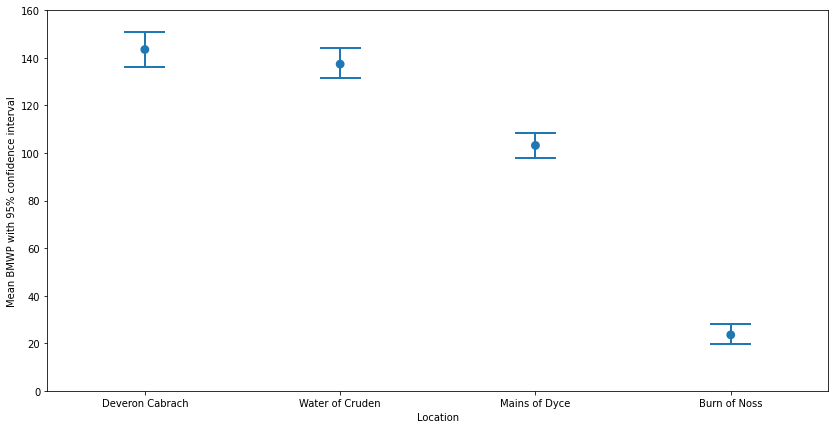

In [ ]:
plotAverageMetrics("BMWP")

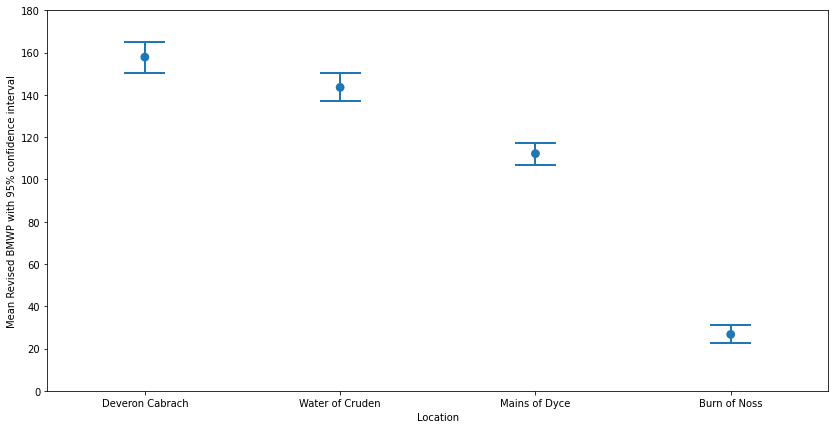

In [ ]:
plotAverageMetrics("Revised BMWP",0,180)

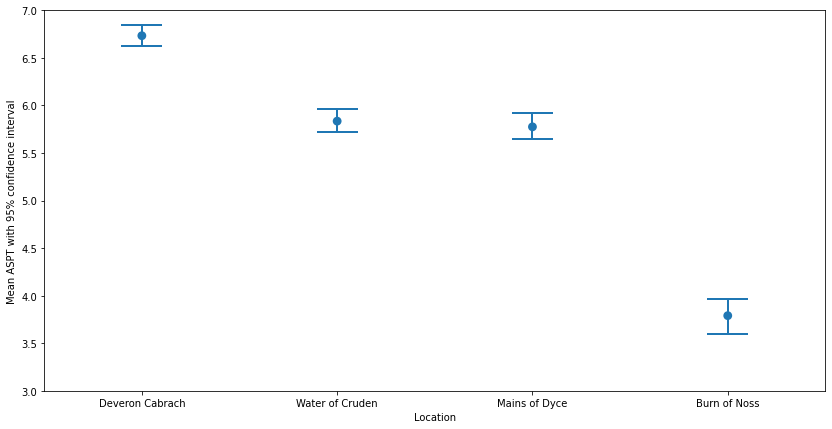

In [ ]:
plotAverageMetrics("ASPT",3,7)

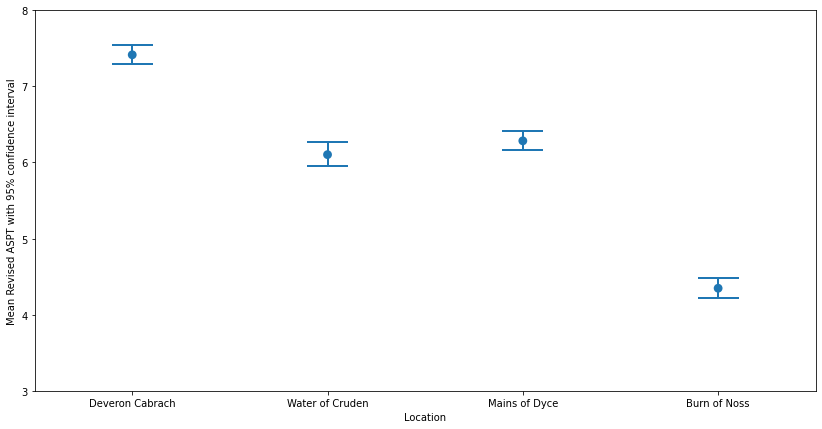

In [ ]:
plotAverageMetrics("Revised ASPT",3,8)